In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#opening dataset initalised with y = 1.48x + 0.25
clean_signal = pd.read_csv("C:\\Users\\L Gokulnath\\Documents\\data_pclub.csv")
clean_signal.head()

,X,Y
0,0,0.25
1,1,1.73
2,2,3.21
3,3,4.69
4,4,6.17


In [4]:
mu, sigma = 0, 0.5
noise = np.random.normal(mu, sigma, [101,2]) 
print(noise)

[[ 0.31378951  0.88050764]
 [-0.01331907 -0.43191689]
 [-0.07763787 -0.13135844]
 [-0.50683538  0.55329198]
 [-0.23581165  0.02911373]
 [-0.25829922 -0.43541063]
 [-0.80889439  0.41460093]
 [ 0.23736861  0.40049114]
 [-0.83600144 -0.27129501]
 [ 0.69779277 -0.523921  ]
 [ 0.09090532 -0.55064172]
 [-0.94237033 -0.14886703]
 [-0.52258189  0.01477786]
 [ 0.35117431  1.00433836]
 [ 0.16336329 -0.04016416]
 [ 0.31100352 -0.72288848]
 [ 0.35474382 -0.18456288]
 [ 0.5848673   0.22823811]
 [-0.1063289   0.31690884]
 [ 0.29654068  0.06025083]
 [ 0.24691079  0.22217194]
 [ 1.04540282  0.08640903]
 [-0.3878257  -0.38865932]
 [ 0.15033336 -0.0769952 ]
 [ 0.34381284  0.68374787]
 [ 0.76965283 -0.49822166]
 [-0.08110339  0.71235278]
 [ 0.54449478  0.53832105]
 [ 0.05870907 -0.63026963]
 [-0.02227353  0.25217549]
 [-0.04859441  0.33397273]
 [ 0.69376492  0.07163699]
 [-0.17977641  0.43653835]
 [-0.39651256  1.00642605]
 [-0.06302156  0.16560696]
 [ 0.38880564 -0.38257731]
 [ 0.19782511 -0.16197046]
 

In [5]:
signal = clean_signal + noise
signal

,X,Y
0,0.313790,1.130508
1,0.986681,1.298083
2,1.922362,3.078642
3,2.493165,5.243292
4,3.764188,6.199114
...,...,...
96,96.201181,141.881292
97,96.652184,144.019143
98,98.338662,145.495749
99,99.219638,147.842983


In [6]:
signal.to_csv("C:\\Users\\L Gokulnath\\Documents\\data_final.csv", index=False)

In [7]:
df = pd.read_csv("C:\\Users\\L Gokulnath\\Documents\\data_final.csv")
df

,X,Y
0,0.313790,1.130508
1,0.986681,1.298083
2,1.922362,3.078642
3,2.493165,5.243292
4,3.764188,6.199114
...,...,...
96,96.201181,141.881292
97,96.652184,144.019143
98,98.338662,145.495749
99,99.219638,147.842983


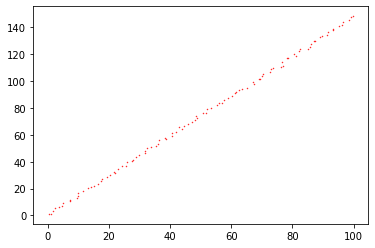

In [8]:
plt.scatter(df.X, df.Y, color= 'red',s=0.2, marker = 'o')
plt.show()

In [13]:
# gradient descent for minimising mean absolute error function
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.00005
    #code for mean absolute error loss function
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([abs(val) for val in (y-y_predicted)])
        md = bd = 0
        for j in range(n):
            val = y[j] - y_predicted[j]
            if val > 0:
                md = md - x[j]
                bd = -1
            else:
                md = md + x[j]
                bd = +1
        md = md/n
        bd = bd/n
                
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
    print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
    return m_curr, b_curr

x = df.X
y = df.Y

m , b = gradient_descent(x,y)

m 1.4867781781964888, b -0.002796039603960687, cost 0.7719013394013008 iteration 9999


1.4867781781964888


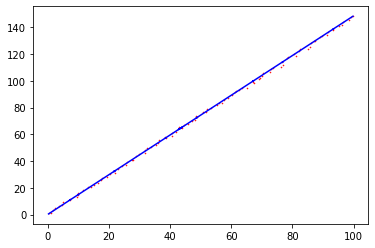

In [15]:
#plt.plot(x, m*x + b, 'r')
print(m)
y_pred = m*x+b
plt.scatter(df.X, df.Y, s=0.3, color='red')
plt.plot(x, y_pred,'b')
plt.show()

In [19]:
#calculating Rsquared value
y_bar = np.mean(y)
#print(y_bar)
SST = sum((y - y_pred)**2)
SSReg = sum((y - y_bar)**2)
Rsquared = 1-SST/SSReg
Rsquared

0.9994603999853537